# 서울시 위탁형 학술용역 목록 정보
데이터 링크 : http://data.seoul.go.kr/dataList/OA-2263/S/1/datasetView.do

In [ ]:
!!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석/

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [7]:
import pandas as pd
import numpy as np
import datetime
import re

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('./서울시 위탁형 학술용역 목록 정보.csv',encoding='cp949')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        327 non-null    int64 
 1   용역명       327 non-null    object
 2   용역기간(시작)  327 non-null    object
 3   용역기간(끝)   327 non-null    object
 4   용역기관      327 non-null    object
 5   필요성       327 non-null    object
 6   연구개요      327 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.0+ KB


In [10]:
df.isnull().sum()

ID          0
용역명         0
용역기간(시작)    0
용역기간(끝)     0
용역기관        0
필요성         0
연구개요        0
dtype: int64

In [11]:
df.head()

,ID,용역명,용역기간(시작),용역기간(끝),용역기관,필요성,연구개요
0,24337,공공건설 품질관리 및 품질 시험검정 개선방안 연구용역,2019-12-09,2020-03-31,(주)날리지웍스,○ 시책(양재R&D혁신지구 조성)에 따른 별관 검사시설 이전 설치의 적정 규모 및 ...,○ 양재R&D지구 조성에 따른 별관 검정시설 이전 신규 조성 규모 검토 ○ 부실공사...
1,22477,누리과정 개편에 따른 서울시어린이집 평가체계 개선 방안 연구,2019-06-24,2019-09-21,사단법인 한국생태유아교육연구소,○ 2020년부터 실시될 누리과정 및 표준보육과정의 개편과 함께 새로운 교육과정의 ...,○ 국내 어린이집 평가체계 및 질 관리 관련 선행연구 결과 분석 ○ 1990년대 ...
2,20717,주거용 집합건물 유형별 세대별 관리방법 연구,2019-05-09,2019-12-09,(사)한국주거서비스소사이어티대한주택관리사협회,○ 집합건물 관리 민원 및 분쟁 등 해소를 위해 구분소유자 합의로 만든 규약이 절대...,○ 연구기관 : 미정 ○ 연구기간 : 10개월(‘19.2~’19.11) ○ 연구내용...
3,22117,제2차 람사스습지 한강밤섬관리 기본계획수립 연구 용역,2019-03-15,2019-09-15,동국대학교 산학협력단,- 2012.6.21 람사르협약에 의한 람사르습지로 지정 등록 - 습지보전법 제9조...,- 사 업 명 : 제2차 람사르습지 한강밤섬관리 기본계획 수립 연구용역 - 사업기간...
4,21897,자원회수시설 주변영향지역 주민건강영향 조사-연구(6단계 1차),2019-02-11,2019-12-07,연세대학교 산학협력단,- 공신력 있는 전문기관에서 장기 연구를 위한 지역 연구대상군을 구성하여 지속적으로...,- 자원회수시설 주변 지역의 환경 및 인체영향 조사 - 혈중 유해 물질의 경향 분석...


In [13]:
def preprocessing(df):
  dataframe = df.copy()
  dataframe['용역기간(시작)'] = dataframe['용역기간(시작)'].map(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d'))
  dataframe['시작_년'] = dataframe['용역기간(시작)'].map(lambda x: x.year)
  dataframe['시작_월'] = dataframe['용역기간(시작)'].map(lambda x: x.month)
  dataframe['시작_일'] = dataframe['용역기간(시작)'].map(lambda x: x.day)
  dataframe['시작_요일'] = dataframe['용역기간(시작)'].map(lambda x: x.weekday())

  dataframe['용역기간(끝)'] = dataframe['용역기간(끝)'].map(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d'))
  dataframe['끝_년'] = dataframe['용역기간(끝)'].map(lambda x: x.year)
  dataframe['끝_월'] = dataframe['용역기간(끝)'].map(lambda x: x.month)
  dataframe['끝_일'] = dataframe['용역기간(끝)'].map(lambda x: x.day)
  dataframe['끝_요일'] = dataframe['용역기간(끝)'].map(lambda x: x.weekday())

  dataframe['용역일수'] = (dataframe['용역기간(끝)'] - dataframe['용역기간(시작)']).map(lambda x: x.days)
  dataframe['용역일수구분'] = dataframe['용역일수'].map(lambda x: 1 if x >= 270 else 0)
  
  return dataframe

data = preprocessing(df)

In [14]:
data.head()

,ID,용역명,용역기간(시작),용역기간(끝),용역기관,필요성,연구개요,시작_년,시작_월,시작_일,시작_요일,끝_년,끝_월,끝_일,끝_요일,용역일수,용역일수구분
0,24337,공공건설 품질관리 및 품질 시험검정 개선방안 연구용역,2019-12-09,2020-03-31,(주)날리지웍스,○ 시책(양재R&D혁신지구 조성)에 따른 별관 검사시설 이전 설치의 적정 규모 및 ...,○ 양재R&D지구 조성에 따른 별관 검정시설 이전 신규 조성 규모 검토 ○ 부실공사...,2019,12,9,0,2020,3,31,1,113,0
1,22477,누리과정 개편에 따른 서울시어린이집 평가체계 개선 방안 연구,2019-06-24,2019-09-21,사단법인 한국생태유아교육연구소,○ 2020년부터 실시될 누리과정 및 표준보육과정의 개편과 함께 새로운 교육과정의 ...,○ 국내 어린이집 평가체계 및 질 관리 관련 선행연구 결과 분석 ○ 1990년대 ...,2019,6,24,0,2019,9,21,5,89,0
2,20717,주거용 집합건물 유형별 세대별 관리방법 연구,2019-05-09,2019-12-09,(사)한국주거서비스소사이어티대한주택관리사협회,○ 집합건물 관리 민원 및 분쟁 등 해소를 위해 구분소유자 합의로 만든 규약이 절대...,○ 연구기관 : 미정 ○ 연구기간 : 10개월(‘19.2~’19.11) ○ 연구내용...,2019,5,9,3,2019,12,9,0,214,0
3,22117,제2차 람사스습지 한강밤섬관리 기본계획수립 연구 용역,2019-03-15,2019-09-15,동국대학교 산학협력단,- 2012.6.21 람사르협약에 의한 람사르습지로 지정 등록 - 습지보전법 제9조...,- 사 업 명 : 제2차 람사르습지 한강밤섬관리 기본계획 수립 연구용역 - 사업기간...,2019,3,15,4,2019,9,15,6,184,0
4,21897,자원회수시설 주변영향지역 주민건강영향 조사-연구(6단계 1차),2019-02-11,2019-12-07,연세대학교 산학협력단,- 공신력 있는 전문기관에서 장기 연구를 위한 지역 연구대상군을 구성하여 지속적으로...,- 자원회수시설 주변 지역의 환경 및 인체영향 조사 - 혈중 유해 물질의 경향 분석...,2019,2,11,0,2019,12,7,5,299,1


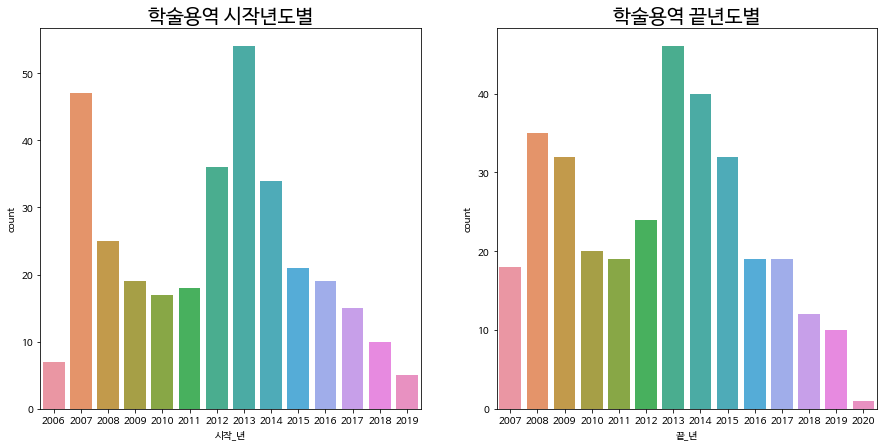

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data['시작_년'])
plt.title('학술용역 시작년도별',size=20)

plt.subplot(1,2,2)
sns.countplot(data['끝_년'])
plt.title('학술용역 끝년도별',size=20)

plt.show()

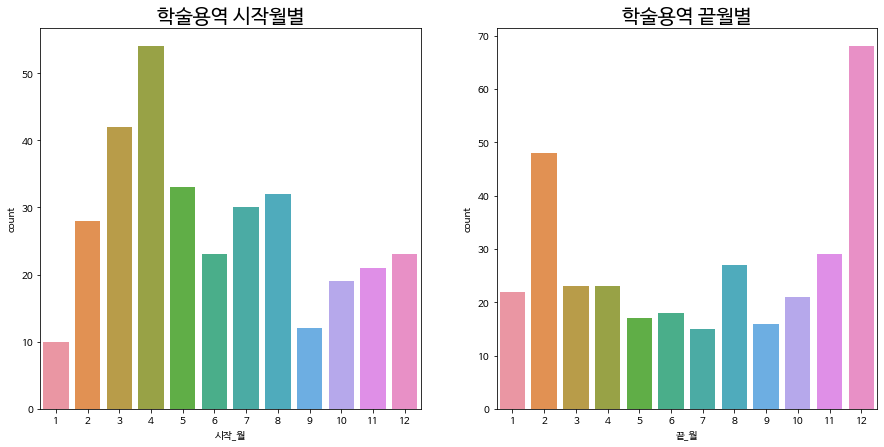

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data['시작_월'])
plt.title('학술용역 시작월별',size=20)

plt.subplot(1,2,2)
sns.countplot(data['끝_월'])
plt.title('학술용역 끝월별',size=20)

plt.show()

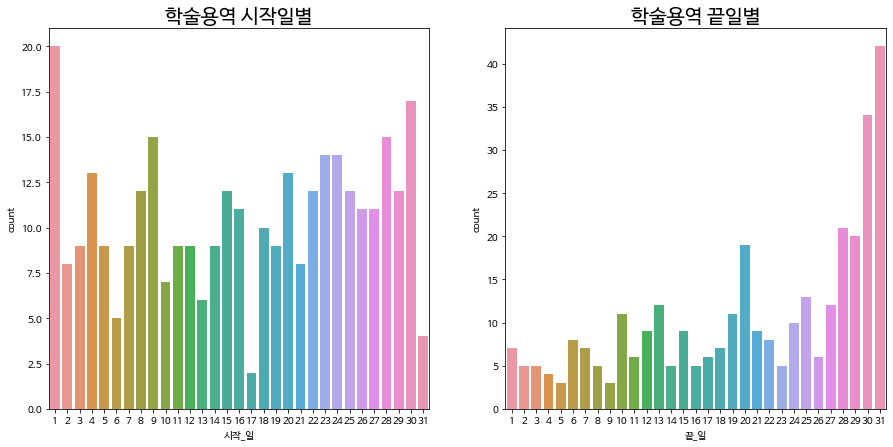

In [17]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data['시작_일'])
plt.title('학술용역 시작일별',size=20)

plt.subplot(1,2,2)
sns.countplot(data['끝_일'])
plt.title('학술용역 끝일별',size=20)

plt.show()

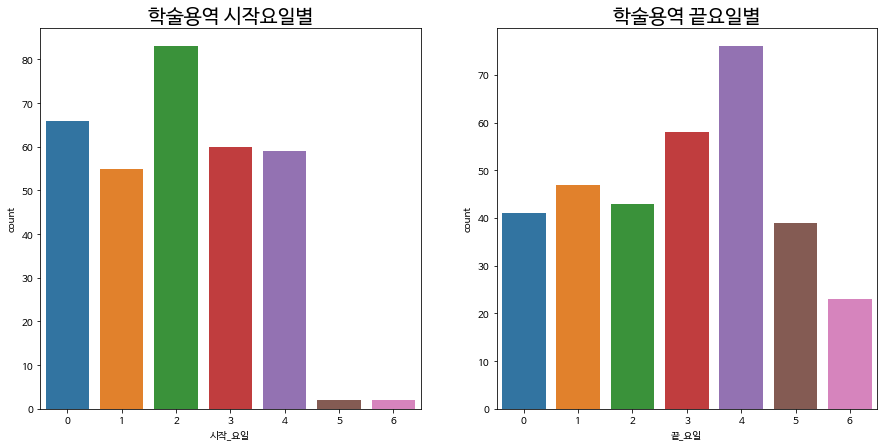

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data['시작_요일'])
plt.title('학술용역 시작요일별',size=20)

plt.subplot(1,2,2)
sns.countplot(data['끝_요일'])
plt.title('학술용역 끝요일별',size=20)

plt.show()

count   327.00000
mean    270.59633
std     139.75981
min      27.00000
25%     159.00000
50%     245.00000
75%     362.00000
max     931.00000
Name: 용역일수, dtype: float64


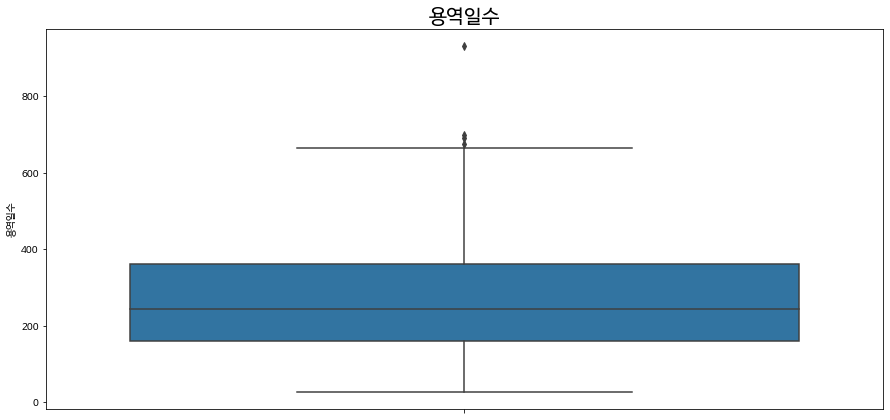

In [19]:
pd.options.display.float_format = '{:.5f}'.format
print(data['용역일수'].describe())
plt.figure(figsize=(15,7))
sns.boxplot(y=data['용역일수'])
plt.title('용역일수',size=20)
plt.show()

서울시정개발연구원               30
서울연구원                   29
서울시립대학교 산학협력단           12
산학협력단                    9
(재)서울연구원                 8
서울대학교 산학협력단              7
도시기반연구본부                 6
시정개발연구원                  4
서울특별시시정개발연구원             4
(재)한국산업관계연구원             4
연세대학교 산학협력단              4
동국대학교 산학협력단              4
경희대학교 산학협력단              3
연세대학교 산학협력단(환경공해연구소)     3
숙명여자대학교 산학협력단            3
숙명여자대학교산학협력단             3
중앙대학교 산학협력단              3
안전환경연구실                  3
한국보건사회연구원                3
(사)한국도시설계학회              3
교통시스템연구실                 3
(사)한국환경복원기술학회            2
(재)서울특별시시정개발연구원          2
한국에너지기술연구원               2
도시교통연구부                  2
디지털도시부                   2
한국교통연구원                  2
도시교통부                    2
한양대학교 산학협력단              2
산학협력단(서울학연구소)            2
Name: 용역기관, dtype: int64


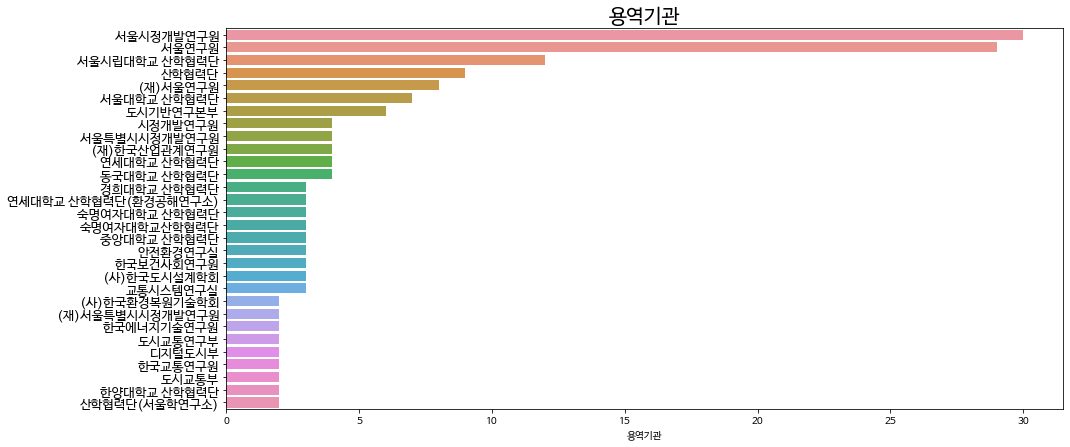

In [24]:
print(data['용역기관'].value_counts()[:30])
plt.figure(figsize=(15,7))
sns.barplot(x = data['용역기관'].value_counts()[:30],y = data['용역기관'].value_counts()[:30].index)
plt.yticks(size=13)
plt.title('용역기관',size=20)
plt.show()

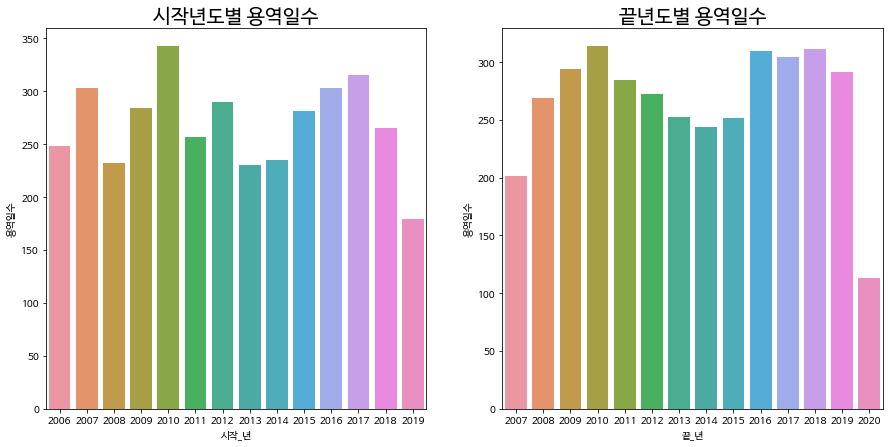

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(y=data.groupby('시작_년').mean()['용역일수'] , x=data.groupby('시작_년').mean()['용역일수'].index)
plt.title('시작년도별 용역일수',size=20)

plt.subplot(1,2,2)
sns.barplot(y=data.groupby('끝_년').mean()['용역일수'] , x=data.groupby('끝_년').mean()['용역일수'].index)
plt.title('끝년도별 용역일수',size=20)

plt.show()

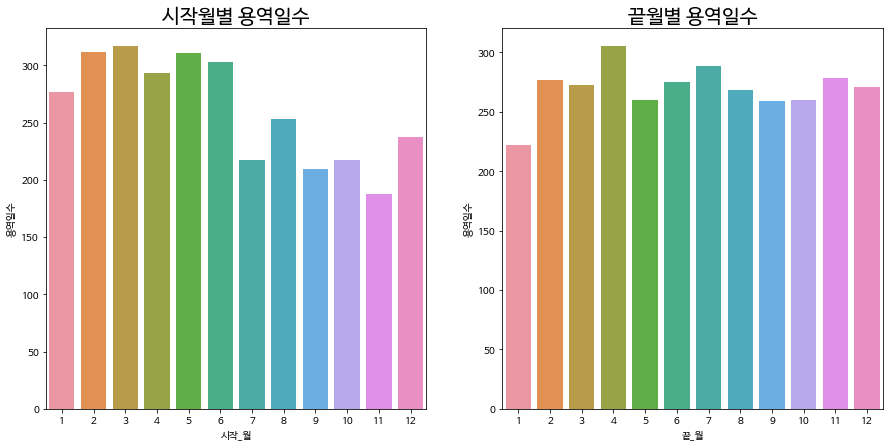

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(y=data.groupby('시작_월').mean()['용역일수'] , x=data.groupby('시작_월').mean()['용역일수'].index)
plt.title('시작월별 용역일수',size=20)

plt.subplot(1,2,2)
sns.barplot(y=data.groupby('끝_월').mean()['용역일수'] , x=data.groupby('끝_월').mean()['용역일수'].index)
plt.title('끝월별 용역일수',size=20)

plt.show()

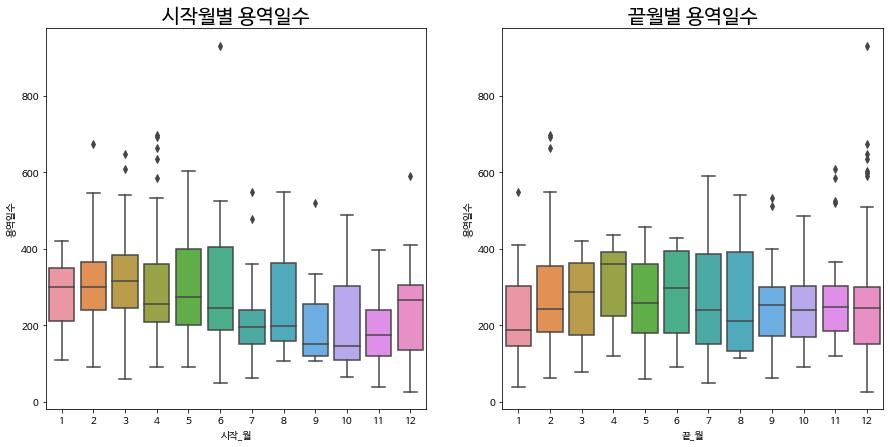

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x='시작_월',y='용역일수',data=data)
plt.title('시작월별 용역일수',size=20)

plt.subplot(1,2,2)
sns.boxplot(x='끝_월',y='용역일수',data=data)
plt.title('끝월별 용역일수',size=20)

plt.show()

# 집단 차이검정 연습

In [ ]:
# F-검정(ANOVA)
# H0 : 시작 월별 용역일수의 차이는 없다
# H1 : 시작 월별 용역일수의 차이는 있다
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

m1 = data[data['시작_월'] == 1]['용역일수']
m2 = data[data['시작_월'] == 2]['용역일수']
m3 = data[data['시작_월'] == 3]['용역일수']
m4 = data[data['시작_월'] == 4]['용역일수']
m5 = data[data['시작_월'] == 5]['용역일수']
m6 = data[data['시작_월'] == 6]['용역일수']
m7 = data[data['시작_월'] == 7]['용역일수']
m8 = data[data['시작_월'] == 8]['용역일수']
m9 = data[data['시작_월'] == 9]['용역일수']
m10 = data[data['시작_월'] == 10]['용역일수']
m11 = data[data['시작_월'] == 11]['용역일수']
m12 = data[data['시작_월'] == 12]['용역일수']

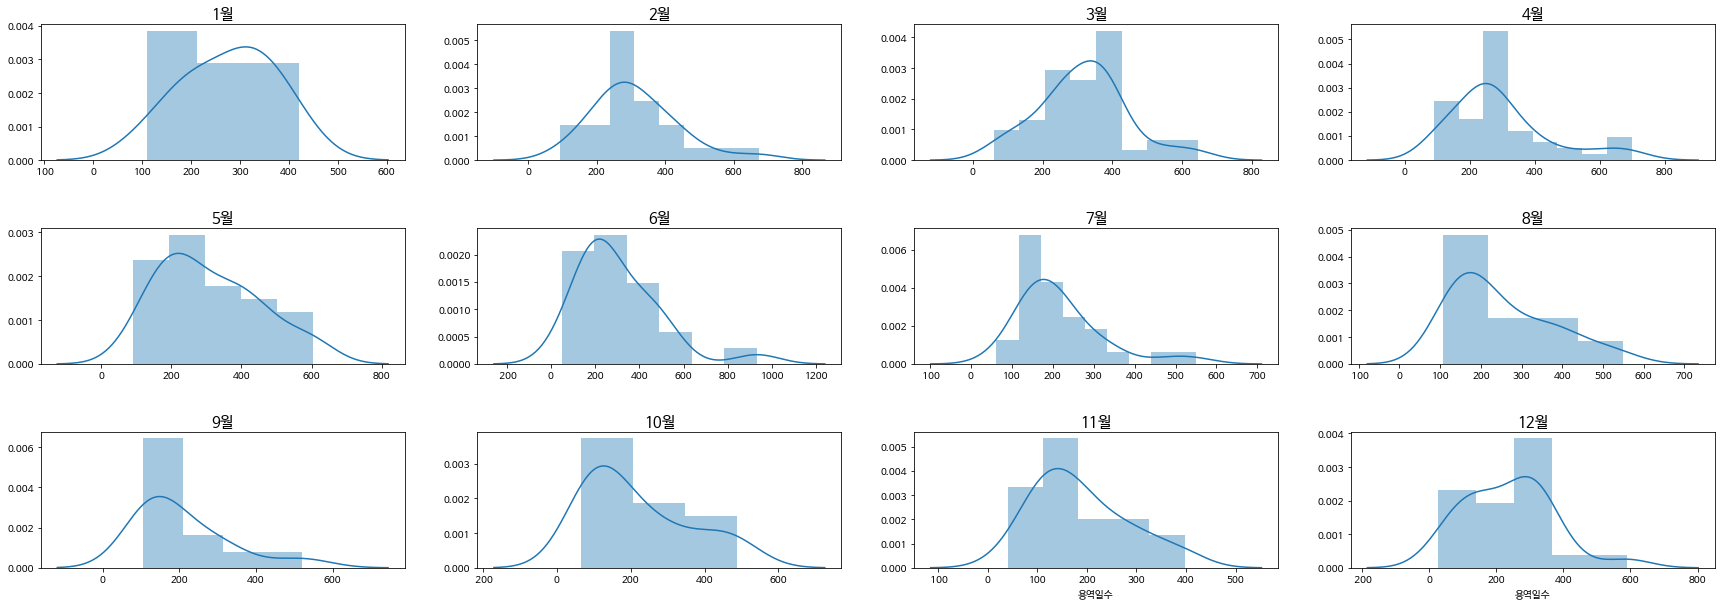

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(3,4,1)
plt.subplots_adjust(hspace=0.5)
sns.distplot(m1)
plt.xlabel('')
plt.ylabel('')
plt.title('1월',size=15)
plt.subplot(3,4,2)
sns.distplot(m2)
plt.xlabel('')
plt.ylabel('')
plt.title('2월',size=15)
plt.subplot(3,4,3)
sns.distplot(m3)
plt.xlabel('')
plt.ylabel('')
plt.title('3월',size=15)
plt.subplot(3,4,4)
sns.distplot(m4)
plt.xlabel('')
plt.ylabel('')
plt.title('4월',size=15)
plt.subplot(3,4,5)
sns.distplot(m5)
plt.xlabel('')
plt.ylabel('')
plt.title('5월',size=15)
plt.subplot(3,4,6)
sns.distplot(m6)
plt.xlabel('')
plt.ylabel('')
plt.title('6월',size=15)
plt.subplot(3,4,7)
sns.distplot(m7)
plt.xlabel('')
plt.ylabel('')
plt.title('7월',size=15)
plt.subplot(3,4,8)
sns.distplot(m8)
plt.xlabel('')
plt.ylabel('')
plt.title('8월',size=15)
plt.subplot(3,4,9)
sns.distplot(m9)
plt.xlabel('')
plt.ylabel('')
plt.title('9월',size=15)
plt.subplot(3,4,10)
sns.distplot(m10)
plt.xlabel('')
plt.ylabel('')
plt.title('10월',size=15)
plt.subplot(3,4,11)
sns.distplot(m11)
plt.ylabel('')
plt.title('11월',size=15)
plt.subplot(3,4,12)
sns.distplot(m12)
plt.ylabel('')
plt.title('12월',size=15)
plt.show()

----shapiro----
 

m1 : ShapiroResult(statistic=0.9598698019981384, pvalue=0.7843868732452393)
m2 : ShapiroResult(statistic=0.9508667588233948, pvalue=0.20830437541007996)
m3 : ShapiroResult(statistic=0.9672894477844238, pvalue=0.267037957906723)
m4 : ShapiroResult(statistic=0.8737528324127197, pvalue=3.9686838135821745e-05)
m5 : ShapiroResult(statistic=0.9446584582328796, pvalue=0.09287379682064056)
m6 : ShapiroResult(statistic=0.8611671924591064, pvalue=0.004365930799394846)
m7 : ShapiroResult(statistic=0.8619148135185242, pvalue=0.00111273059155792)
m8 : ShapiroResult(statistic=0.895926833152771, pvalue=0.004885603673756123)
m9 : ShapiroResult(statistic=0.8008388876914978, pvalue=0.009577076882123947)
m10 : ShapiroResult(statistic=0.8498232364654541, pvalue=0.006664212327450514)
m11: ShapiroResult(statistic=0.9415563941001892, pvalue=0.23387254774570465)
m12 : ShapiroResult(statistic=0.9480487108230591, pvalue=0.2664582431316376)
----kstest----
 KstestResult(statistic=1.0, pvalue=0.

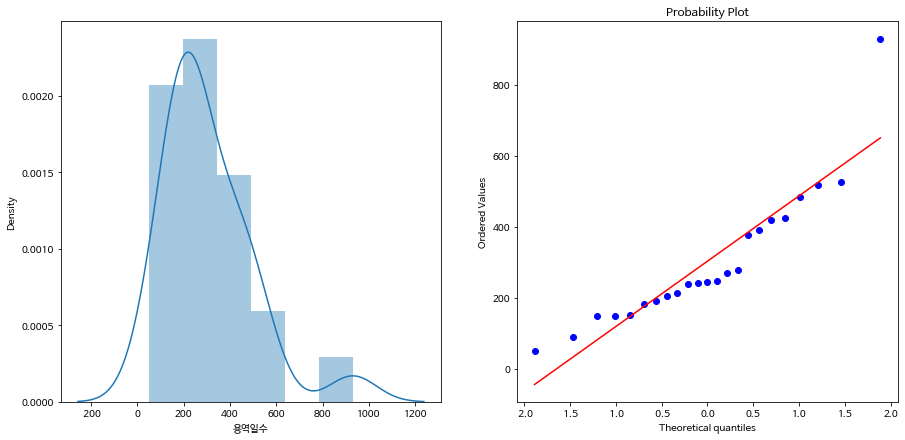

In [ ]:
# 정규성 검정
# H0 : 월 평균 데이터셋이 정규분포를 따른다
# H1 : 월 평균 데이터셋이 정규분포를 따르지 않는다

# shapiro : 표본의 수가 2000 미만
from scipy.stats import shapiro
print('----shapiro----\n','\n')
print(f'm1 : {shapiro(m1)}')
print(f'm2 : {shapiro(m2)}')
print(f'm3 : {shapiro(m3)}')
print(f'm4 : {shapiro(m4)}')
print(f'm5 : {shapiro(m5)}')
print(f'm6 : {shapiro(m6)}')
print(f'm7 : {shapiro(m7)}')
print(f'm8 : {shapiro(m8)}')
print(f'm9 : {shapiro(m9)}')
print(f'm10 : {shapiro(m10)}')
print(f'm11: {shapiro(m11)}')
print(f'm12 : {shapiro(m12)}')

# Kolmogorove-Smirnov : 표본의 수가 2000 이상
from scipy.stats import kstest
print('----kstest----\n',kstest(m1,'norm'),'\n')

# 분포 ,qqplot을 활용해 시각적으로 확인
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(m6)
plt.subplot(1,2,2)
stats.probplot(m6,dist=stats.norm,plot=plt)
plt.show()

In [ ]:
dd = data.copy()
dd['용역일수'] = np.log(dd['용역일수'])

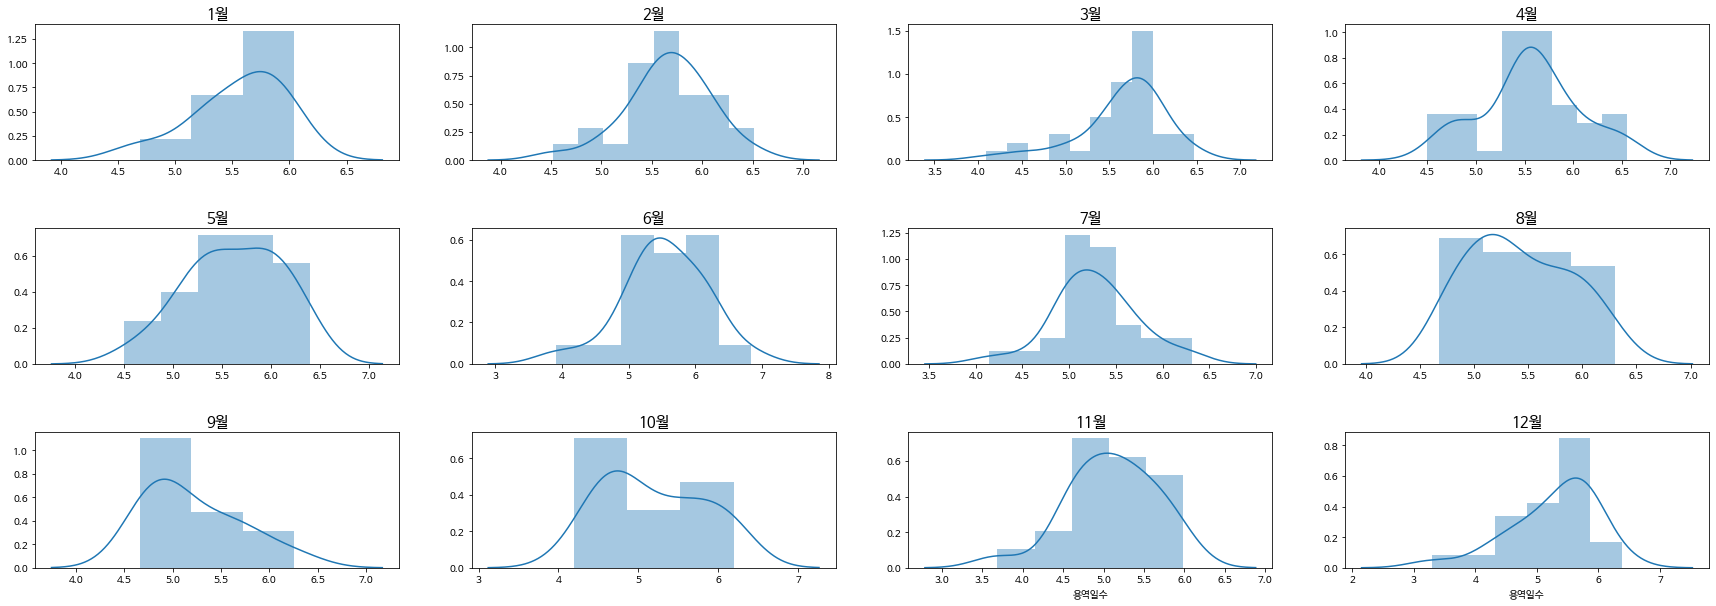

In [ ]:
m1 = dd[dd['시작_월'] == 1]['용역일수']
m2 = dd[dd['시작_월'] == 2]['용역일수']
m3 = dd[dd['시작_월'] == 3]['용역일수']
m4 = dd[dd['시작_월'] == 4]['용역일수']
m5 = dd[dd['시작_월'] == 5]['용역일수']
m6 = dd[dd['시작_월'] == 6]['용역일수']
m7 = dd[dd['시작_월'] == 7]['용역일수']
m8 = dd[dd['시작_월'] == 8]['용역일수']
m9 = dd[dd['시작_월'] == 9]['용역일수']
m10 = dd[dd['시작_월'] == 10]['용역일수']
m11 = dd[dd['시작_월'] == 11]['용역일수']
m12 = dd[dd['시작_월'] == 12]['용역일수']

plt.figure(figsize=(30,10))
plt.subplot(3,4,1)
plt.subplots_adjust(hspace=0.5)
sns.distplot(m1)
plt.xlabel('')
plt.ylabel('')
plt.title('1월',size=15)
plt.subplot(3,4,2)
sns.distplot(m2)
plt.xlabel('')
plt.ylabel('')
plt.title('2월',size=15)
plt.subplot(3,4,3)
sns.distplot(m3)
plt.xlabel('')
plt.ylabel('')
plt.title('3월',size=15)
plt.subplot(3,4,4)
sns.distplot(m4)
plt.xlabel('')
plt.ylabel('')
plt.title('4월',size=15)
plt.subplot(3,4,5)
sns.distplot(m5)
plt.xlabel('')
plt.ylabel('')
plt.title('5월',size=15)
plt.subplot(3,4,6)
sns.distplot(m6)
plt.xlabel('')
plt.ylabel('')
plt.title('6월',size=15)
plt.subplot(3,4,7)
sns.distplot(m7)
plt.xlabel('')
plt.ylabel('')
plt.title('7월',size=15)
plt.subplot(3,4,8)
sns.distplot(m8)
plt.xlabel('')
plt.ylabel('')
plt.title('8월',size=15)
plt.subplot(3,4,9)
sns.distplot(m9)
plt.xlabel('')
plt.ylabel('')
plt.title('9월',size=15)
plt.subplot(3,4,10)
sns.distplot(m10)
plt.xlabel('')
plt.ylabel('')
plt.title('10월',size=15)
plt.subplot(3,4,11)
sns.distplot(m11)
plt.ylabel('')
plt.title('11월',size=15)
plt.subplot(3,4,12)
sns.distplot(m12)
plt.ylabel('')
plt.title('12월',size=15)
plt.show()

----shapiro----
 

m1 : ShapiroResult(statistic=0.9103598594665527, pvalue=0.2834722101688385)
m2 : ShapiroResult(statistic=0.9720619320869446, pvalue=0.6368286609649658)
m3 : ShapiroResult(statistic=0.8974639177322388, pvalue=0.0012097973376512527)
m4 : ShapiroResult(statistic=0.9567422270774841, pvalue=0.049292974174022675)
m5 : ShapiroResult(statistic=0.9721761345863342, pvalue=0.5425867438316345)
m6 : ShapiroResult(statistic=0.9689040184020996, pvalue=0.6627827882766724)
m7 : ShapiroResult(statistic=0.9708608984947205, pvalue=0.5629926323890686)
m8 : ShapiroResult(statistic=0.9493629336357117, pvalue=0.13824021816253662)
m9 : ShapiroResult(statistic=0.8998549580574036, pvalue=0.15793706476688385)
m10 : ShapiroResult(statistic=0.9239093065261841, pvalue=0.13366858661174774)
m11: ShapiroResult(statistic=0.966384768486023, pvalue=0.6524704098701477)
m12 : ShapiroResult(statistic=0.9133380651473999, pvalue=0.04804643243551254)
----kstest----
 KstestResult(statistic=0.9999788317839459, 

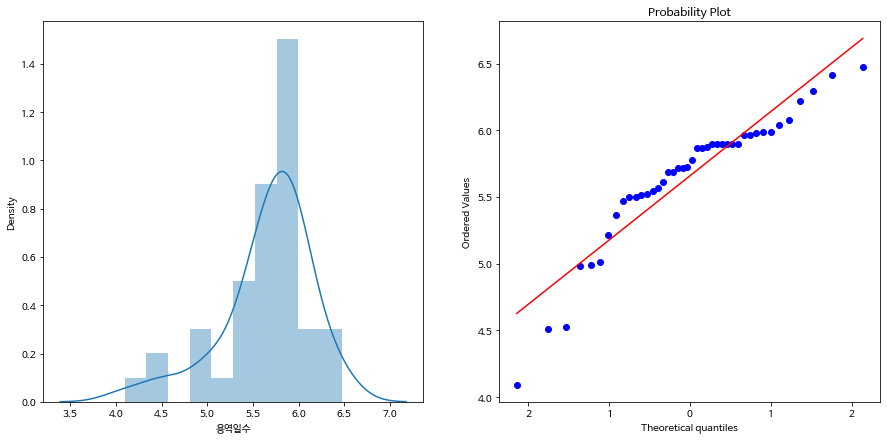

In [ ]:
# 정규성 검정
# H0 : 월별 평균 데이터셋이 정규분포를 따른다
# H1 : 월별 평균 데이터셋이 정규분포를 따르지 않는다

# shapiro : 표본의 수가 2000 미만
from scipy.stats import shapiro
print('----shapiro----\n','\n')
print(f'm1 : {shapiro(m1)}')
print(f'm2 : {shapiro(m2)}')
print(f'm3 : {shapiro(m3)}')
print(f'm4 : {shapiro(m4)}')
print(f'm5 : {shapiro(m5)}')
print(f'm6 : {shapiro(m6)}')
print(f'm7 : {shapiro(m7)}')
print(f'm8 : {shapiro(m8)}')
print(f'm9 : {shapiro(m9)}')
print(f'm10 : {shapiro(m10)}')
print(f'm11: {shapiro(m11)}')
print(f'm12 : {shapiro(m12)}')

# Kolmogorove-Smirnov : 표본의 수가 2000 이상
from scipy.stats import kstest
print('----kstest----\n',kstest(m3,'norm'),'\n')

# 분포 ,qqplot을 활용해 시각적으로 확인
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(m3)
plt.subplot(1,2,2)
stats.probplot(m3,dist=stats.norm,plot=plt)
plt.show()

In [ ]:
# 등분산성 검정
# H0 : 각 데이터셋의 분산은 차이가 없다. (각 데이터셋의 분산은 동일하다)
# H1 : 각 데이터셋의 분산은 차이가 있다. (각 데이터셋의 분산은 동일하지 않다)

from scipy.stats import levene
levene(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)

LeveneResult(statistic=1.212298057268645, pvalue=0.2775493228216838)

In [ ]:
cross_tab = pd.crosstab(data['시작_월'], data['용역일수구분'], margins=True)
cross_tab

용역일수구분,0,1,All
시작_월,,,
1,4,6,10
2,10,18,28
3,15,27,42
4,32,22,54
5,16,17,33
6,13,10,23
7,24,6,30
8,20,12,32
9,9,3,12


In [ ]:
# 독립성 검정
# H0 : 용역일수와 시작월은 연관이 없다. (두 변수는 독립이다)
# H1 : 용역일수와 시작월은 연관이 있다. (두 변수는 독립이 아니다)

from scipy.stats import chi2_contingency
print('Chi-square : ', chi2_contingency(cross_tab,correction=False)[0])
print('P-value : ', chi2_contingency(cross_tab,correction=False)[1])

Chi-square :  27.869531426208795
P-value :  0.2655814238664975


In [ ]:
F_statistic, pVal = stats.f_oneway(m1, m2, m3, m4,m5,m6,m7,m8,m9,m10,m11,m12)

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=3.7, p=0.00006


In [ ]:
ddd = dd[['시작_월','용역일수']]
ddd

,시작_월,용역일수
0,12,4.72739
1,6,4.48864
2,5,5.36598
3,3,5.21494
4,2,5.70044
...,...,...
322,11,4.48864
323,11,5.18739
324,6,6.05209
325,4,5.89715


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
 
model = ols('용역일수 ~ C(시작_월)', ddd).fit()
anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(시작_월),11.00000,11.10074,1.00916,3.66767,0.00006
Residual,315.00000,86.67213,0.27515,NaN,NaN


In [ ]:
# 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(ddd['용역일수'],ddd['시작_월'])
tukeyhsd_result = comp.tukeyhsd()
tukeyhsd_result.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.1087,0.9,-0.5276,0.7451,False
1,3,0.1024,0.9,-0.5054,0.7102,False
1,4,0.0049,0.9,-0.5897,0.5995,False
1,5,0.0711,0.9,-0.5524,0.6946,False
1,6,-0.0201,0.9,-0.6743,0.6342,False
1,7,-0.274,0.9,-0.9048,0.3567,False
1,8,-0.1328,0.9,-0.7586,0.493,False
1,9,-0.3376,0.9,-1.0771,0.402,False
1,10,-0.3697,0.7899,-1.0445,0.3052,False
1,11,-0.4531,0.5139,-1.1167,0.2106,False


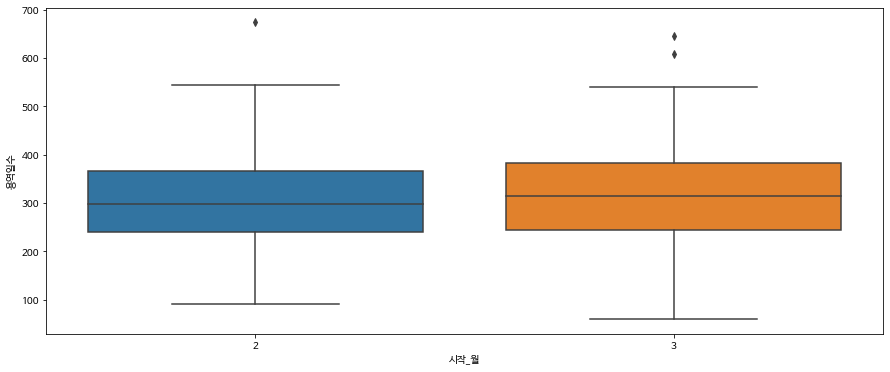

In [ ]:
# 2월 3월간 평균의 차이 t검정
group = data[(data['시작_월'] == 2) | (data['시작_월'] == 3)][['시작_월','용역일수']]

plt.figure(figsize=(15,6))
sns.boxplot(x='시작_월', y='용역일수', data=group)
plt.show()

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
group

,시작_월,용역일수
3,3,184
4,2,299
13,3,262
14,3,294
25,3,255
...,...,...
315,3,296
316,2,92
317,2,302
318,2,150


In [ ]:
# 가정확인
month_2 = group[group['시작_월'] == 2]
month_3 = group[group['시작_월'] == 3]

n1 = shapiro(month_2['용역일수'])
n2 = shapiro(month_3['용역일수'])
print('정규성 n1 : ', n1,'\n')
print('정규성 n2 : ', n2,'\n')

print('등분산성 : ' ,levene(month_2['용역일수'],month_3['용역일수']))

정규성 n1 :  ShapiroResult(statistic=0.9508667588233948, pvalue=0.20830437541007996) 

정규성 n2 :  ShapiroResult(statistic=0.9672894477844238, pvalue=0.267037957906723) 

등분산성 :  LeveneResult(statistic=0.11340797549942776, pvalue=0.737334201518574)


In [ ]:
from scipy.stats import ttest_ind
print(ttest_ind(month_2['용역일수'],month_3['용역일수']))

Ttest_indResult(statistic=-0.1485082964959653, pvalue=0.8823811613459503)
